**Libraries Required and input data**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Number of passengers in train dataset: ' + str(len(train)))

Number of passengers in train dataset: 891


**Number of Passengers Survived**

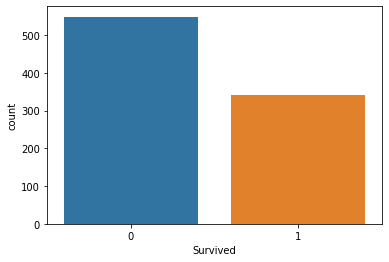

In [21]:
sns.countplot(x = 'Survived', data = train)

**Train Data**

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
pcl = pd.get_dummies(train['Pclass'],drop_first=True)

**Concat new features to the train data**

In [23]:
train = pd.concat([train,sex,embark,pcl],axis=1)

**Drop the columns which are not reuired in prediction**

In [24]:
train.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

**Handling Null Values**

In [25]:
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value = train_values)

**Test Data**

In [26]:
sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pcl = pd.get_dummies(test['Pclass'],drop_first=True)

**Concat new features to the test data**

In [27]:
test = pd.concat([test,sex,embark,pcl],axis=1)

**Dropping columns from test data**

In [28]:
test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)

**Handling NUll in Test Data**

In [29]:
test_values = {'Age':round(np.mean(test['Age'])), 'Fare':round(np.mean(test['Fare']))}
test = test.fillna(value = test_values)

In [30]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Define Model**

In [31]:
logmodel = LogisticRegression(solver = 'liblinear')

**Fit Model**

In [32]:
logmodel.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
predections = logmodel.predict(X_test)

**Evaluation of the defined Model**







Classification Report



In [33]:
print(classification_report(y_test, predections))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



Confusion Matrix



In [34]:
print(confusion_matrix(y_test, predections))

[[135  18]
 [ 40  75]]


Accuracy



In [35]:
print(accuracy_score(y_test, predections))

0.7835820895522388


**Prediction**

In [36]:
test_predictions = logmodel.predict(test)

**Submission**

In [37]:
sub_file = pd.read_csv('test.csv')
sub_file['Survived'] = test_predictions
sub_file.to_csv('submission.csv',index=False)